In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_curve,auc


# 모델 평가

## (1) 데이터 구성

In [2]:
df_raw=pd.read_csv("/Users/lee/Week3/HMEQ.csv",engine="python",encoding='cp949')
df_raw.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


## (2) 결측치 처리

In [3]:
#결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw["JOB"].fillna("Other",inplace=True)
df_raw.fillna(df_raw.mean(),inplace=True)

## (3) 더미변수 생성

In [5]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
df_raw=df_raw_dummy
df_raw_y=df_raw["BAD"]
df_raw_x=df_raw.drop("BAD",axis=1,inplace=False)

## (4) 데이터 분할

In [7]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

## (5) 분류 모델 실행

In [8]:
model = ["DecisionTree","RandomForest","GradientBoosting","NeuralNet"]

train_accuracy=[];test_accuracy=[]

model_f1_score=[]
model_auc=[]

## (6) 의사결정 나무

In [9]:
dt_model=DecisionTreeClassifier(min_samples_leaf=30,max_depth=4)

dt_model.fit(df_train_x,df_train_y)

train_accuracy.append(dt_model.score(df_train_x,df_train_y))
test_accuracy.append(dt_model.score(df_test_x,df_test_y))

y_pred=dt_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

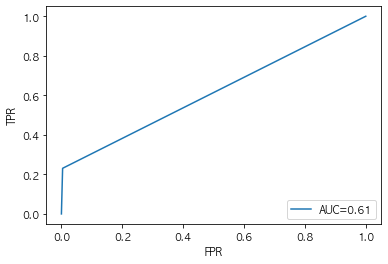

In [10]:
plt.plot(fpr,tpr,label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [11]:
model_f1_score.append(f1_score(df_test_y,y_pred))

## (7) 랜덤 포레스트

In [12]:
dt_model=RandomForestClassifier(min_samples_leaf=20,n_estimators=100,random_state=1234,max_depth=4)

dt_model.fit(df_train_x,df_train_y)

train_accuracy.append(dt_model.score(df_train_x,df_train_y))
test_accuracy.append(dt_model.score(df_test_x,df_test_y))

y_pred=dt_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

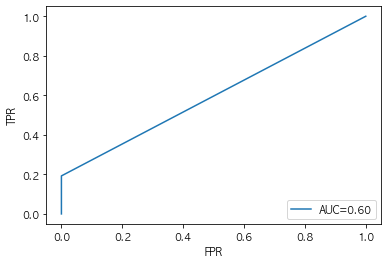

In [13]:
plt.plot(fpr,tpr,label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [14]:
model_f1_score.append(f1_score(df_test_y,y_pred))

## (8) 그래디언트 부스팅

In [15]:
dt_model=GradientBoostingClassifier(min_samples_leaf=10,n_estimators=100,learning_rate=0.1,random_state=1234,max_depth=4)

dt_model.fit(df_train_x,df_train_y)

train_accuracy.append(dt_model.score(df_train_x,df_train_y))
test_accuracy.append(dt_model.score(df_test_x,df_test_y))

y_pred=dt_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

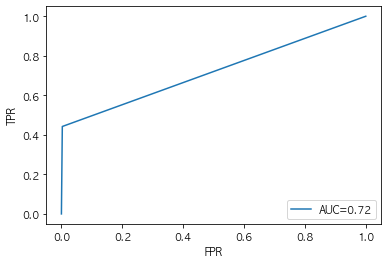

In [16]:
plt.plot(fpr,tpr,label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [17]:
model_f1_score.append(f1_score(df_test_y,y_pred))

## (9) 설명 변수 scaling

In [18]:
v_feature_names=df_train_x.columns

scaler=StandardScaler()

df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_names)

In [19]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (2623, 18)
train data Y size : (1125, 18)


## (10) 인공신경망

In [20]:
nn_model = MLPClassifier(hidden_layer_sizes=(80,80),activation='relu',solver='adam',random_state=1234)
nn_model.fit(df_scaled_train_x,df_train_y)

train_accuracy.append(nn_model.score(df_scaled_train_x,df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x,df_test_y))

y_pred = nn_model.predict(df_scaled_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

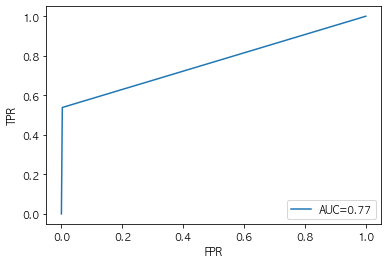

In [21]:
plt.plot(fpr,tpr,label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [22]:
model_f1_score.append(f1_score(df_test_y,y_pred))

## (11) 모델별 정확도 산출 및 평가

In [23]:
df_eval=pd.DataFrame(index=model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"]=test_accuracy
df_eval["F1Score"]=model_f1_score
df_eval["AUC"]=model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720
NeuralNet,1.000,0.955,0.687,0.768


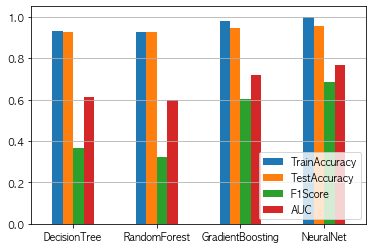

In [24]:
df_eval.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.grid(axis="y")

## (12)